# ThinkBrake: Oracle Experiment

## Import and Configs

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all_data = [
    {
        "Category": "GSM8K",
        "Base Acc": 95.1,
        "Oracle Acc": 97.8,
        "Base Tok": 1578,
        "Delta Tok": -0.691,
    },
    {
        "Category": "MATH500",
        "Base Acc": 95.3,
        "Oracle Acc": 99.8,
        "Base Tok": 6360,
        "Delta Tok": -0.600,
    },
    {
        "Category": "AIME2024",
        "Base Acc": 76.7,
        "Oracle Acc": 86.7,
        "Base Tok": 19284,
        "Delta Tok": -0.416,
    },
    {
        "Category": "AIME2025",
        "Base Acc": 72.5,
        "Oracle Acc": 93.3,
        "Base Tok": 21317,
        "Delta Tok": -0.455,
    },
    {
        "Category": "BFCL simple",
        "Base Acc": 78.7,
        "Oracle Acc": 91.5,
        "Base Tok": 1155,
        "Delta Tok": -0.826,
    },
    {
        "Category": "BFCL multiple",
        "Base Acc": 96.5,
        "Oracle Acc": 98.5,
        "Base Tok": 985,
        "Delta Tok": -0.937,
    },
    {
        "Category": "BFCL parallel",
        "Base Acc": 91.5,
        "Oracle Acc": 96.0,
        "Base Tok": 1200,
        "Delta Tok": -0.896,
    },
    {
        "Category": "BFCL multi-parallel",
        "Base Acc": 89.0,
        "Oracle Acc": 95.5,
        "Base Tok": 1621,
        "Delta Tok": -0.901,
    },
]

df = pd.DataFrame(all_data)
df["Rollout Accuracy (%)"] = df["Base Acc"]
df["Oracle Accuracy (%)"] = df["Oracle Acc"]
df["Rollout Avg Tokens"] = df["Base Tok"]
df["Avg First Correct Tokens"] = df["Base Tok"] * (1 + df["Delta Tok"])

categories = df["Category"].tolist()
x = np.arange(len(categories))
bar_width = 0.35

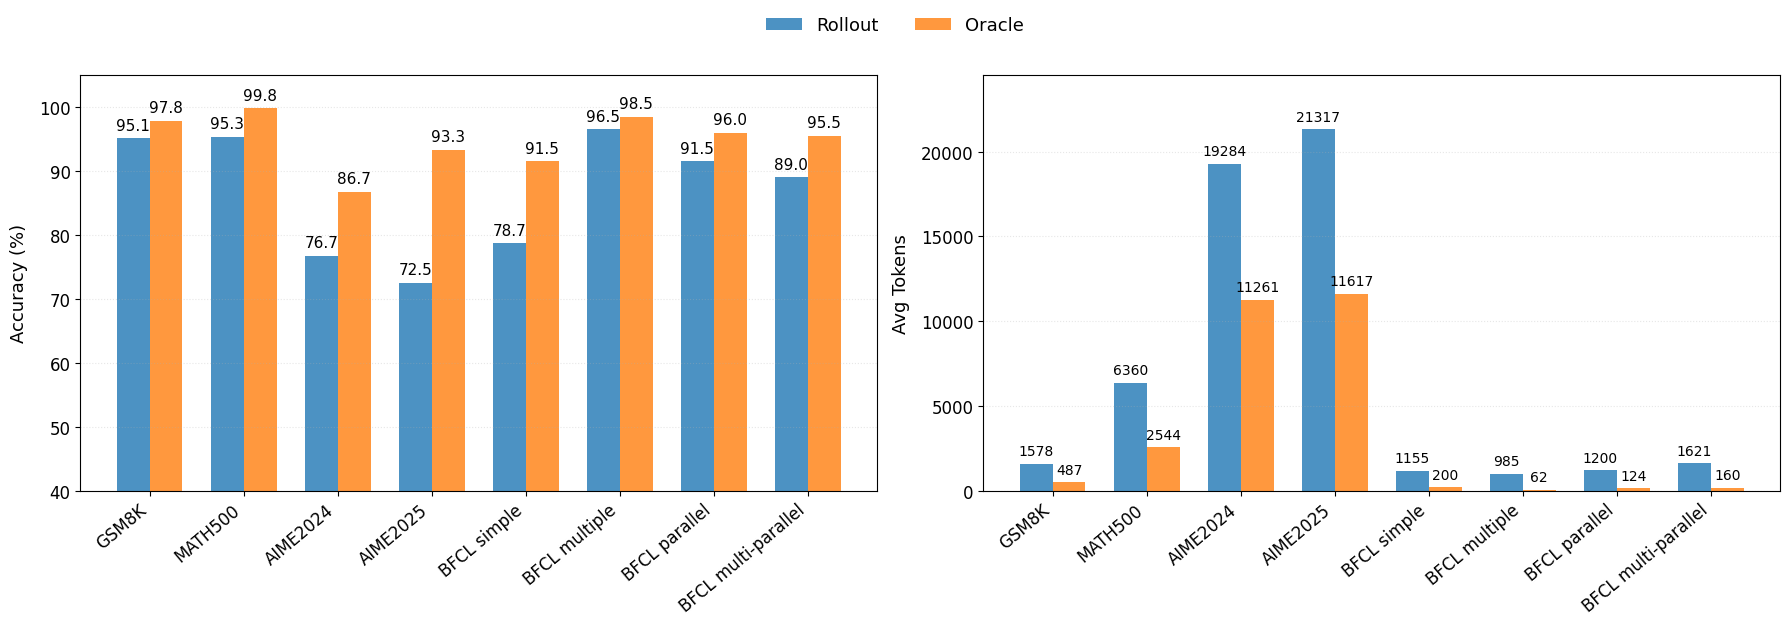

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

bars1 = axes[0].bar(
    x - bar_width / 2,
    df["Rollout Accuracy (%)"],
    width=bar_width,
    label="Rollout",
    color="#1f77b4",
    alpha=0.8,
)

bars2 = axes[0].bar(
    x + bar_width / 2,
    df["Oracle Accuracy (%)"],
    width=bar_width,
    label="Oracle",
    color="#ff7f0e",
    alpha=0.8,
)

axes[0].set_ylabel("Accuracy (%)", fontsize=13, labelpad=8)
axes[0].set_ylim(40, 105)
axes[0].set_yticks(np.arange(40, 101, 10))
axes[0].grid(axis="y", linestyle=":", alpha=0.3)

for bar in bars1 + bars2:
    h = bar.get_height()
    axes[0].annotate(
        f"{h:.1f}",
        (bar.get_x() + bar.get_width() / 2, h),
        xytext=(0, 4),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=11,
    )

bars3 = axes[1].bar(
    x - bar_width / 2,
    df["Rollout Avg Tokens"],
    width=bar_width,
    label="Rollout",
    color="#1f77b4",
    alpha=0.8,
)

bars4 = axes[1].bar(
    x + bar_width / 2,
    df["Avg First Correct Tokens"],
    width=bar_width,
    label="Oracle",
    color="#ff7f0e",
    alpha=0.8,
)

axes[1].set_ylabel("Avg Tokens", fontsize=13, labelpad=8)
axes[1].set_ylim(
    0, max(df["Rollout Avg Tokens"].max(), df["Avg First Correct Tokens"].max()) * 1.15
)
axes[1].grid(axis="y", linestyle=":", alpha=0.3)

for bar in bars3 + bars4:
    h = bar.get_height()
    axes[1].annotate(
        f"{int(h)}",
        (bar.get_x() + bar.get_width() / 2, h),
        xytext=(0, 4),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,
    )

for ax in axes:
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=40, ha="right", fontsize=12)
    ax.tick_params(axis="y", labelsize=12)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=False,
    fontsize=13,
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("../assets/oracle_experiment.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()

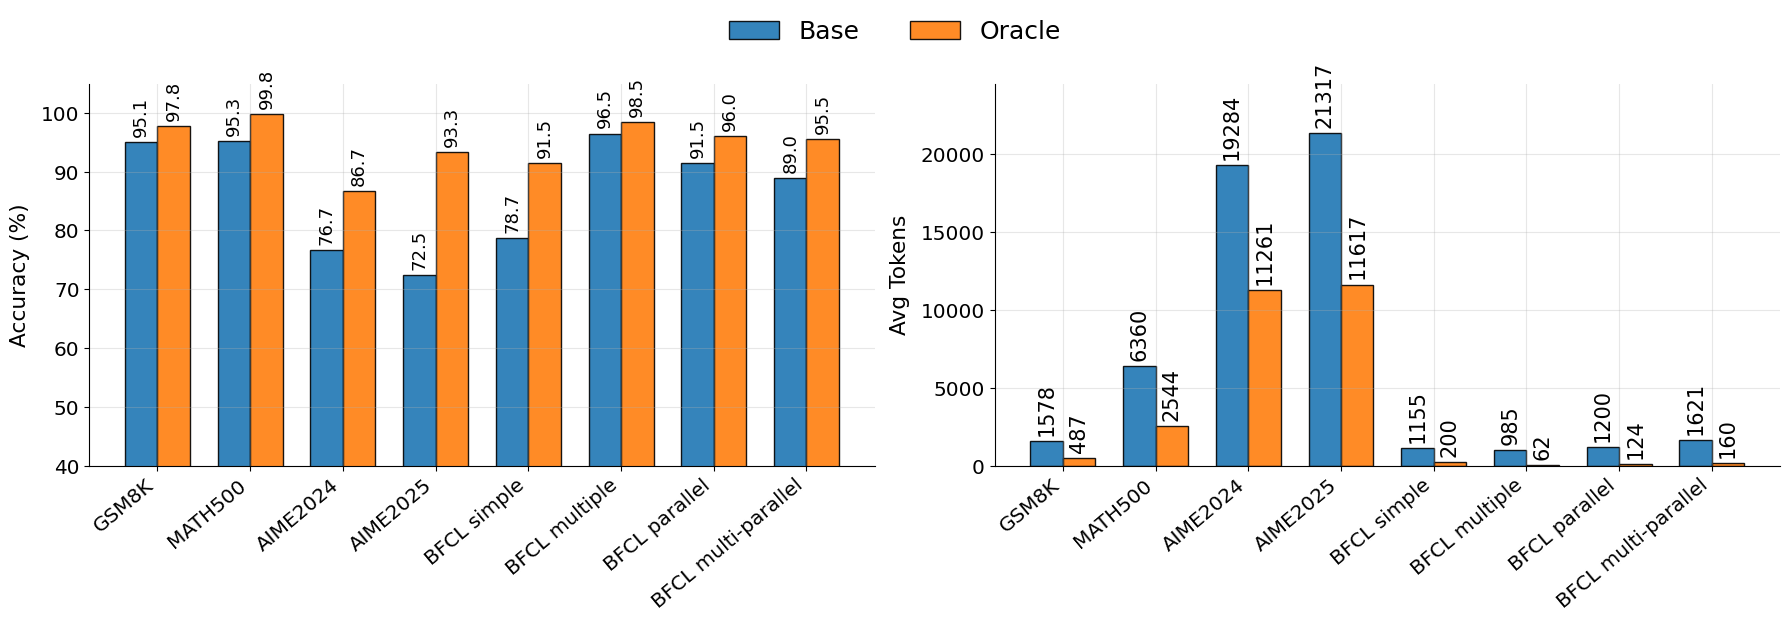

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
bars1 = axes[0].bar(
    x - bar_width / 2,
    df["Rollout Accuracy (%)"],
    width=bar_width,
    label="Base",
    color="#1f77b4",
    edgecolor="black",
    alpha=0.9,
)
bars2 = axes[0].bar(
    x + bar_width / 2,
    df["Oracle Accuracy (%)"],
    width=bar_width,
    label="Oracle",
    color="#ff7f0e",
    edgecolor="black",
    alpha=0.9,
)
axes[0].set_ylabel("Accuracy (%)", fontsize=15.6, labelpad=8)
axes[0].set_ylim(40, 105)
axes[0].set_yticks(np.arange(40, 101, 10))
axes[0].grid(True, axis="y", alpha=0.3)
axes[0].grid(True, axis="x", alpha=0.3)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
for bar in bars1 + bars2:
    h = bar.get_height()
    axes[0].annotate(
        f"{h:.1f}",
        (bar.get_x() + bar.get_width() / 2, h),
        xytext=(0, 4),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=13,
        rotation=90,
    )

bars3 = axes[1].bar(
    x - bar_width / 2,
    df["Rollout Avg Tokens"],
    width=bar_width,
    label="Base",
    color="#1f77b4",
    edgecolor="black",
    alpha=0.9,
)
bars4 = axes[1].bar(
    x + bar_width / 2,
    df["Avg First Correct Tokens"],
    width=bar_width,
    label="Oracle",
    color="#ff7f0e",
    edgecolor="black",
    alpha=0.9,
)
axes[1].set_ylabel("Avg Tokens", fontsize=15.6, labelpad=8)
axes[1].set_ylim(
    0, max(df["Rollout Avg Tokens"].max(), df["Avg First Correct Tokens"].max()) * 1.15
)
axes[1].grid(True, axis="y", alpha=0.3)
axes[1].grid(True, axis="x", alpha=0.3)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
for bar in bars3 + bars4:
    h = bar.get_height()
    axes[1].annotate(
        f"{int(h)}",
        (bar.get_x() + bar.get_width() / 2, h),
        xytext=(0, 4),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=13,
        rotation=90,
    )

for ax in axes:
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=40, ha="right", fontsize=14.4)
    ax.tick_params(axis="y", labelsize=14.4)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=False,
    fontsize=18,
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("../assets/oracle_experiment.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()